In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import tensorflow as tf

In [2]:
df = pd.read_csv('/content/VCB.VN-BaoCao.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,40478.953125,41275.257813,40346.234375,41275.257813,41275.257813,1225908.0
1,2019-03-04,41275.257813,41806.132813,41275.257813,41673.414063,41673.414063,2030592.0
2,2019-03-05,41673.414063,42337.003906,41474.335938,41806.132813,41806.132813,2376092.0
3,2019-03-06,41872.488281,42005.207031,41076.183594,41607.054688,41607.054688,2107101.0
4,2019-03-07,41607.054688,42337.003906,41540.695313,41872.488281,41872.488281,3091640.0


In [4]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Train test 8:2

In [5]:
# Split data into train and test sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [6]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

In [7]:
X_train, y_train

(array([[   0],
        [   1],
        [   2],
        ...,
        [1045],
        [1046],
        [1047]]),
 array([41275.257813, 41673.414063, 41806.132813, ..., 78746.828125,
        78154.109375, 77900.085938]))

In [8]:
# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred.flatten())



Predictions: [74520.83156946 74545.88156517 74570.93156087 74595.98155657
 74621.03155227 74646.08154798 74671.13154368 74696.18153938
 74721.23153508 74746.28153079 74771.33152649 74796.38152219
 74821.43151789 74846.4815136  74871.5315093  74896.581505
 74921.6315007  74946.68149641 74971.73149211 74996.78148781
 75021.83148351 75046.88147922 75071.93147492 75096.98147062
 75122.03146632 75147.08146203 75172.13145773 75197.18145343
 75222.23144913 75247.28144484 75272.33144054 75297.38143624
 75322.43143194 75347.48142765 75372.53142335 75397.58141905
 75422.63141475 75447.68141046 75472.73140616 75497.78140186
 75522.83139756 75547.88139327 75572.93138897 75597.98138467
 75623.03138037 75648.08137608 75673.13137178 75698.18136748
 75723.23136318 75748.28135889 75773.33135459 75798.38135029
 75823.43134599 75848.4813417  75873.5313374  75898.5813331
 75923.6313288  75948.68132451 75973.73132021 75998.78131591
 76023.83131161 76048.88130731 76073.93130302 76098.98129872
 76124.0312944

In [9]:
last_index = df.index[-1]

# Create arrays of consecutive integers for the next 90 days
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)



In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
# Calculating test metrics
mape_test = mean_absolute_percentage_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
msle_test = mean_squared_log_error(y_test, y_pred)

# Print result
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MSLE:", round(msle_test, 3))
print('-------------------')

---------TEST----------
MAPE: 0.116
MAE: 10378.652
RMSE: 10929.857
MSLE: 0.017
-------------------


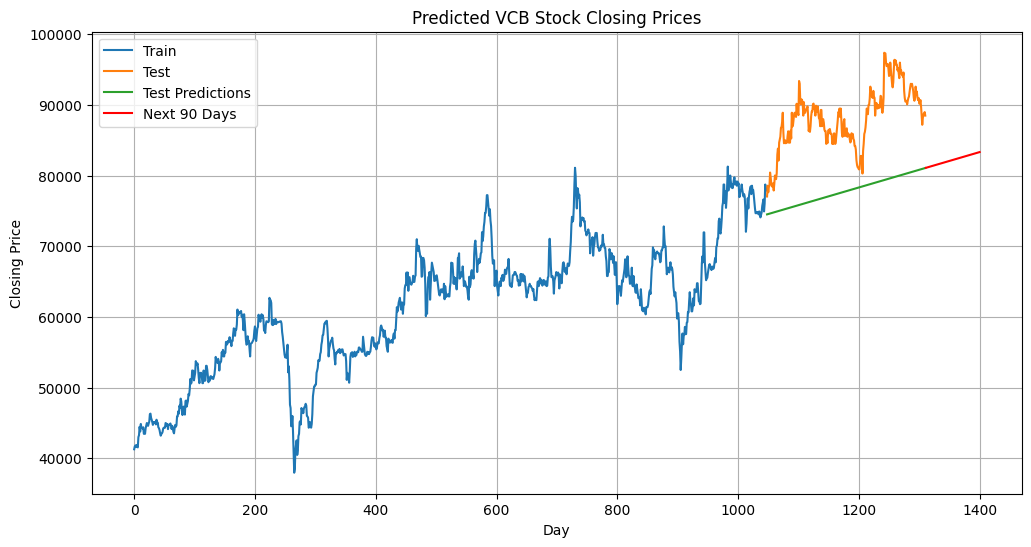

In [11]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days', color='red')

# Adding titles and labels
plt.title('Predicted VCB Stock Closing Prices')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Train test 7:3

In [12]:
df = pd.read_csv('/content/VCB.VN-BaoCao.csv')

In [13]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [14]:
# Split data into train and test sets
train_size = int(len(df) * 0.7)
train_data, test_data = df[:train_size], df[train_size:]

In [15]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [16]:
X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred.flatten())



Predictions: [71385.64356155 71410.87098599 71436.09841043 71461.32583488
 71486.55325932 71511.78068376 71537.0081082  71562.23553265
 71587.46295709 71612.69038153 71637.91780598 71663.14523042
 71688.37265486 71713.6000793  71738.82750375 71764.05492819
 71789.28235263 71814.50977707 71839.73720152 71864.96462596
 71890.1920504  71915.41947484 71940.64689929 71965.87432373
 71991.10174817 72016.32917261 72041.55659706 72066.7840215
 72092.01144594 72117.23887038 72142.46629483 72167.69371927
 72192.92114371 72218.14856816 72243.3759926  72268.60341704
 72293.83084148 72319.05826593 72344.28569037 72369.51311481
 72394.74053925 72419.9679637  72445.19538814 72470.42281258
 72495.65023702 72520.87766147 72546.10508591 72571.33251035
 72596.55993479 72621.78735924 72647.01478368 72672.24220812
 72697.46963257 72722.69705701 72747.92448145 72773.15190589
 72798.37933034 72823.60675478 72848.83417922 72874.06160366
 72899.28902811 72924.51645255 72949.74387699 72974.97130143
 73000.19872

In [17]:
last_index = df.index[-1]

# Create arrays of consecutive integers for the next 90 days
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)



In [18]:
from sklearn.metrics import mean_absolute_error

# Calculating test metrics
mape_test = mean_absolute_percentage_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
msle_test = mean_squared_log_error(y_test, y_pred)

# Print result
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MSLE:", round(msle_test, 3))
print('-------------------')

---------TEST----------
MAPE: 0.098
MAE: 8307.594
RMSE: 9308.642
MSLE: 0.013
-------------------


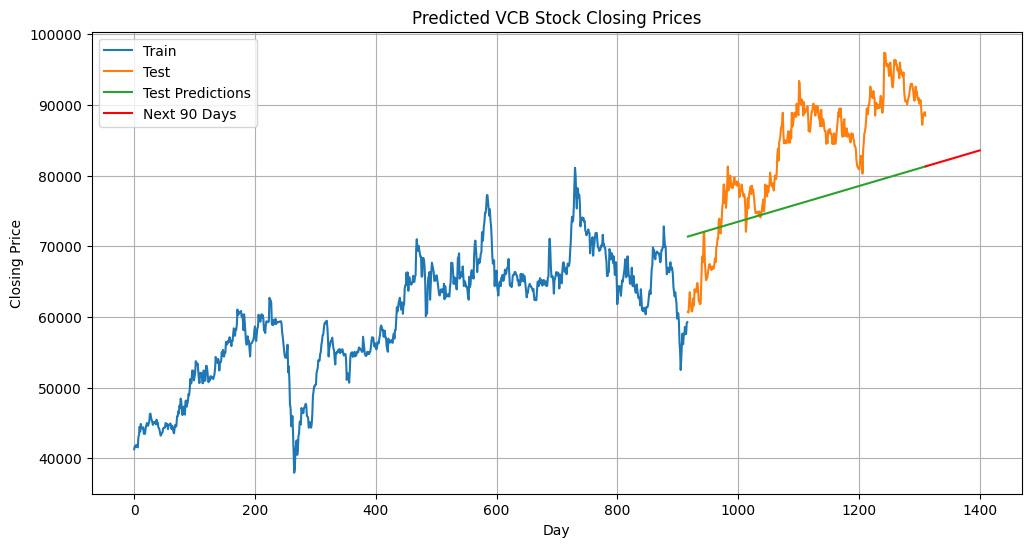

In [19]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days', color='red')

# Adding titles and labels
plt.title('Predicted VCB Stock Closing Prices')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Train test 9:1

In [20]:
df = pd.read_csv('/content/VCB.VN-BaoCao.csv')

In [21]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [22]:
# Split data into train and test sets
train_size = int(len(df) * 0.9)
train_data, test_data = df[:train_size], df[train_size:]

In [23]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [24]:
X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred.flatten())



Predictions: [81947.34169316 81977.51011243 82007.6785317  82037.84695097
 82068.01537025 82098.18378952 82128.35220879 82158.52062806
 82188.68904733 82218.8574666  82249.02588587 82279.19430515
 82309.36272442 82339.53114369 82369.69956296 82399.86798223
 82430.0364015  82460.20482078 82490.37324005 82520.54165932
 82550.71007859 82580.87849786 82611.04691713 82641.2153364
 82671.38375568 82701.55217495 82731.72059422 82761.88901349
 82792.05743276 82822.22585203 82852.39427131 82882.56269058
 82912.73110985 82942.89952912 82973.06794839 83003.23636766
 83033.40478693 83063.57320621 83093.74162548 83123.91004475
 83154.07846402 83184.24688329 83214.41530256 83244.58372184
 83274.75214111 83304.92056038 83335.08897965 83365.25739892
 83395.42581819 83425.59423747 83455.76265674 83485.93107601
 83516.09949528 83546.26791455 83576.43633382 83606.60475309
 83636.77317237 83666.94159164 83697.11001091 83727.27843018
 83757.44684945 83787.61526872 83817.783688   83847.95210727
 83878.12052

In [25]:
last_index = df.index[-1]

# Create arrays of consecutive integers for the next 90 days
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)



In [26]:
from sklearn.metrics import mean_absolute_error

# Calculating test metrics
mape_test = mean_absolute_percentage_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
msle_test = mean_squared_log_error(y_test, y_pred)

# Print result
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MSLE:", round(msle_test, 3))
print('-------------------')

---------TEST----------
MAPE: 0.069
MAE: 6311.754
RMSE: 7141.888
MSLE: 0.006
-------------------


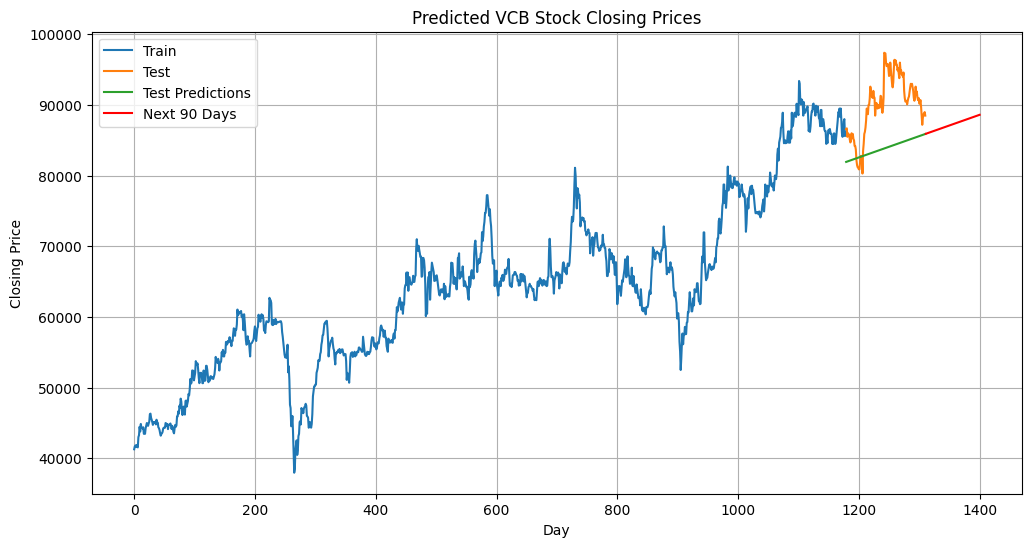

In [27]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days', color='red')

# Adding titles and labels
plt.title('Predicted VCB Stock Closing Prices')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()